# Бэйзлайн по разработке LGD модели

### Импортируем библиотеки

In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Подгружаем данные

In [191]:
!wget https://raw.githubusercontent.com/BKHV/ds-test/master/LGD-data.csv
df = pd.read_csv('LGD-data.csv', sep=';')

/bin/sh: wget: command not found


Размер выборки

In [153]:
print(df.shape)

(3047, 53)


In [154]:
df.head(5)

,symbol,name,issue_date,EPS,QuoteLast,Price200DayAverage,Price52WeekPercChange,PriceToBook,MarketCap,PE,...,OperatingMargin,NetProfitMarginPercent,NetIncomeGrowthRate5Years,RevenueGrowthRate5Years,RevenueGrowthRate10Years,EPSGrowthRate5Years,EPSGrowthRate10Years,Volume,AverageVolume,LGD
0,1AD,Adalta Ltd,31/10/2015,0.00,0.25,0.00,0.00,0.00,18720000.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,50513,0.932171
1,1AG,Alterra Ltd,31/12/2015,0.00,0.03,0.05,78.62,0.34,4270000.0,0.00,...,9.77,6.30,0.0,0.0,0.0,0.0,0.0,229789,106383,0.921420
2,1AL,Oneall International Ltd,31/07/2010,0.09,0.99,0.97,1.50,5.66,127070000.0,10.81,...,27.36,22.56,0.0,0.0,0.0,0.0,0.0,14300,9904,0.996325
3,1PG,1-Page Ltd,29/02/2012,0.13,0.19,0.38,94.31,0.45,29300000.0,0.00,...,1486.59,1519.24,0.0,0.0,0.0,0.0,0.0,415620,1450000,0.979607
4,1ST,1st Group Ltd,31/10/2012,0.06,0.05,0.06,14.15,0.92,10530000.0,0.00,...,281.56,252.40,0.0,0.0,0.0,0.0,0.0,100000,36233,0.719730


In [174]:
X = df[['EPS', 'MarketCap']]
y = (10 * df[['LGD']]).round(1).astype(np.int32)

In [175]:
X.head(3)

,EPS,MarketCap
0,0.00,18720000.0
1,0.00,4270000.0
2,0.09,127070000.0


In [176]:
y.head(3)

,LGD
0,9
1,9
2,10


No handles with labels found to put in legend.


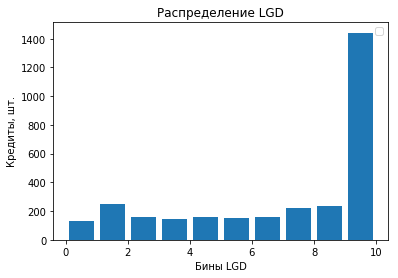

In [182]:
import matplotlib.pyplot as plt
bins = [0,1,2,3,4,5,6,7,8,9,10]
plt.hist(y.values, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Бины LGD')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

### Обучаем дерево

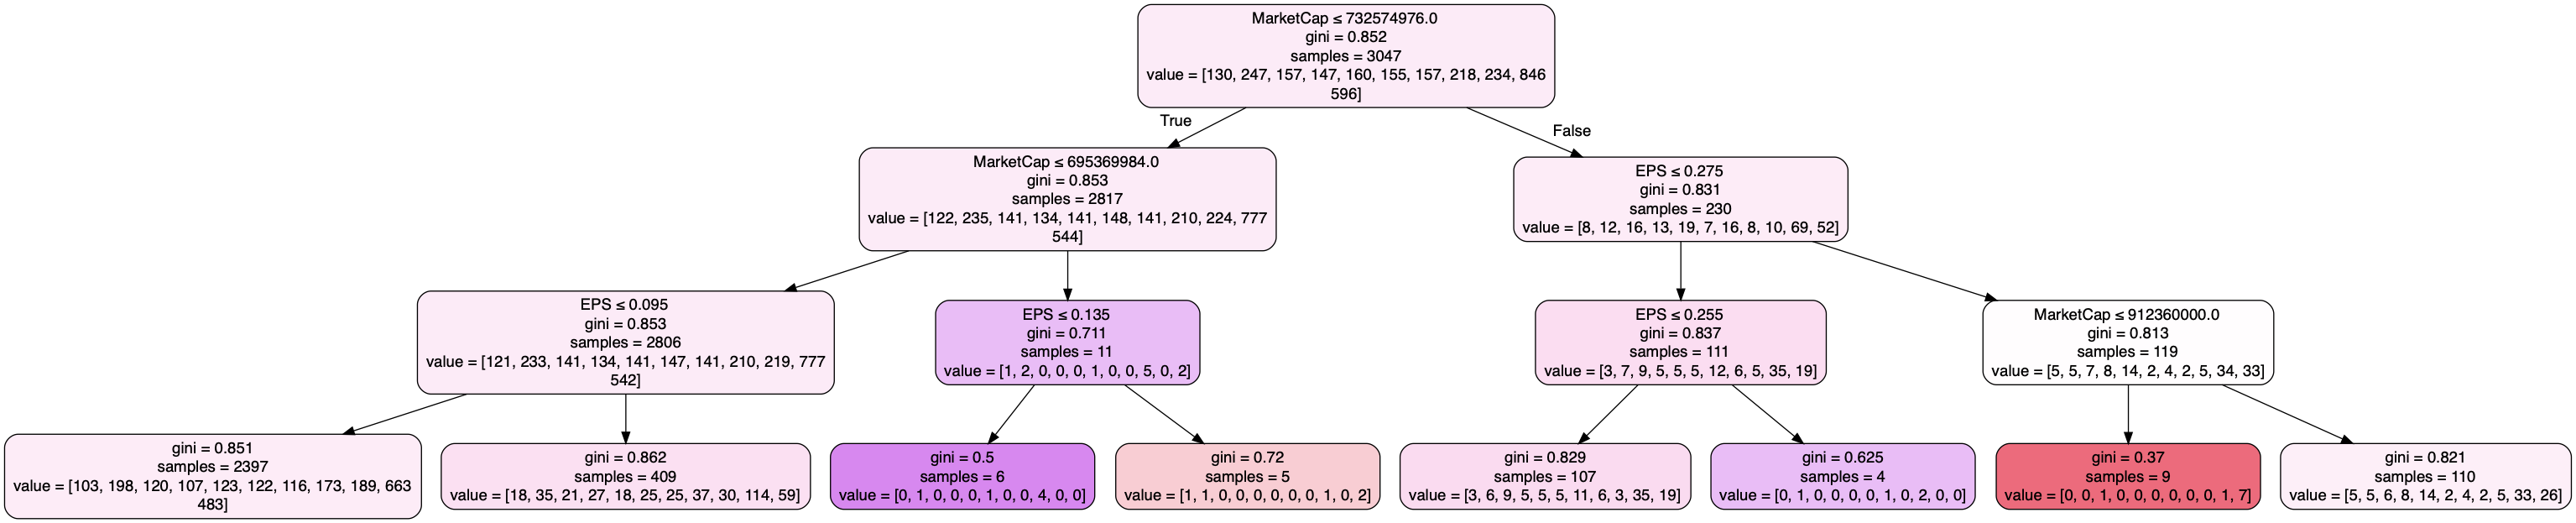

In [200]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=3)
dtree.fit(X,y)
dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data, 
                feature_names = list(X.columns),
                filled = True, 
                rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())